# Introduction to Probability Distributions

This notebook codes up some of the distributions mentioned in the first couple of videos using pymc.

At the end of the notebook, we derive the Bayes Rule.
____

In [4]:
%%capture
!pip install pymc

In [5]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

## 1. Normal Distribution (Continuous)

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

$x$ is the value,\
$\mu$ is the mean,\
$\sigma$ is the standard deviation


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [normal_rv]


Output()

Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 0 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


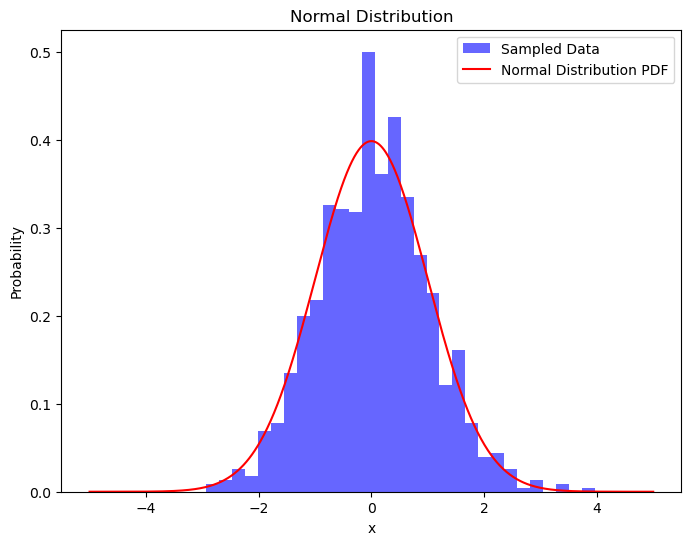

In [10]:
with pm.Model() as normal_model:
    # Define a normal random variable
    normal_rv = pm.Normal('normal_rv', mu=0, sigma=1)
    # Sample from the distribution
    normal_trace = pm.sample(1000, return_inferencedata=False, chains=1)

plt.figure(figsize=(8, 6))
plt.hist(normal_trace['normal_rv'], bins=30, density=True, alpha=0.6, color='b', label='Sampled Data')
x = np.linspace(-5, 5, 1000)
pdf_normal = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2)
plt.plot(x, pdf_normal, label='Normal Distribution PDF', color='r')
plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel('Probability')
plt.legend()
plt.show()

## 2. Binomial Distribution (Discrete)


**Bernoulli**: Describes a single trial with two possible outcomes.\
**Binomial**: Describes the total number of successes in a fixed number of Bernoulli trials.\
**Negative Binomial**: Describes the number of trials needed to achieve a fixed number of successes in a series of Bernoulli trials.

Sequential sampling (1 chains in 1 job)
Metropolis: [binomial_rv]


Output()

Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 0 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


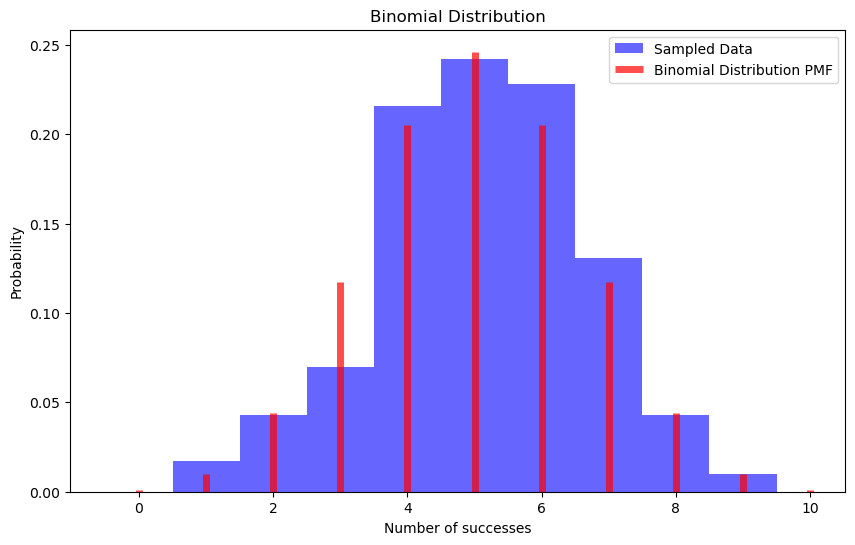

In [11]:
with pm.Model() as binomial_model:
    # Define a binomial random variable
    binomial_rv = pm.Binomial('binomial_rv', n=10, p=0.5)
    # Sample from the distribution
    binomial_trace = pm.sample(1000, return_inferencedata=False, chains=1)

# Plotting the distribution
plt.figure(figsize=(10, 6))
x_binom = np.arange(0, 11)
plt.hist(binomial_trace['binomial_rv'], bins=x_binom - 0.5, density=True, alpha=0.6, color='b', label='Sampled Data')
pmf_binom = [np.exp(pm.logp(binomial_rv, i).eval()) for i in x_binom]
plt.vlines(x_binom, 0, pmf_binom, colors='r', lw=5, alpha=0.7, label='Binomial Distribution PMF')
plt.title("Binomial Distribution")
plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.legend()
plt.show()

## 3. Poisson Distribution (Discrete)

The Poisson distribution applies to discrete events that can be counted as whole numbers (e.g., 0, 1, 2, 3, ...).

The Poisson distribution is characterized by a single parameter, $\lambda$, which represents the average rate (mean) of occurrences within the interval.

$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$

$\lambda$ is the average rate of occurrence,\
$k$ is the actual number of events

Example use case:

Counting the number of occurrences of an event within a fixed period of time, such as the number of phone calls received by a call center in an hour, or the number of emails received per day


Sequential sampling (1 chains in 1 job)
Metropolis: [poisson_rv]


Output()

Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 0 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


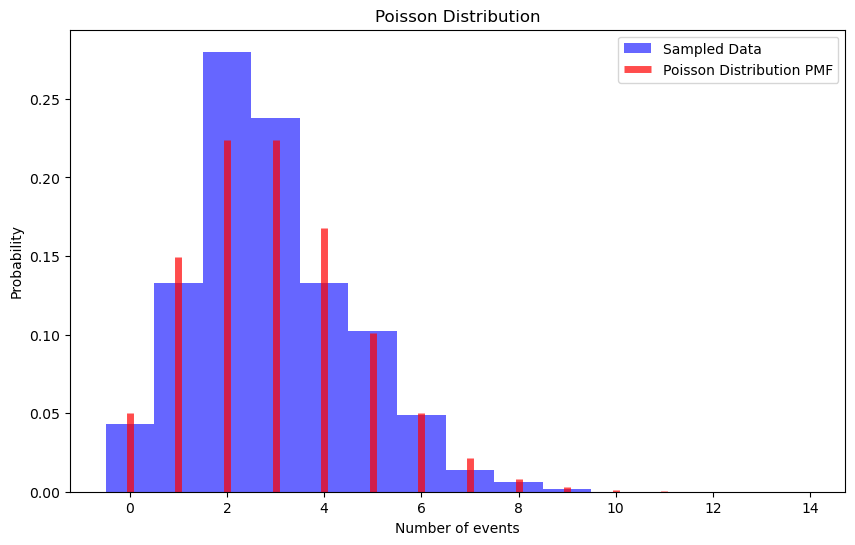

In [12]:
with pm.Model() as poisson_model:
    # Define a Poisson random variable
    poisson_rv = pm.Poisson('poisson_rv', mu=3)
    # Sample from the distribution
    poisson_trace = pm.sample(1000, return_inferencedata=False, chains=1)

# Plotting the distribution
plt.figure(figsize=(10, 6))
x_poisson = np.arange(0, 15)
plt.hist(poisson_trace['poisson_rv'], bins=x_poisson - 0.5, density=True, alpha=0.6, color='b', label='Sampled Data')
pmf_poisson = [np.exp(pm.logp(poisson_rv, i).eval()) for i in x_poisson]
plt.vlines(x_poisson, 0, pmf_poisson, colors='r', lw=5, alpha=0.7, label='Poisson Distribution PMF')
plt.title("Poisson Distribution")
plt.xlabel("Number of events")
plt.ylabel("Probability")
plt.legend()
plt.show()

# Bayes Rule Derivation

The conditional probability of event A given event B is defined as:

$P(A \mid B) = \frac{P(A \cap B)}{P(B)}$

Similarly, the conditional probability of event B given event A is:

$P(B \mid A) = \frac{P(A \cap B)}{P(A)}$

The joint probability $P(A \cap B)$ can be expressed in two ways based on the definitions above:

$P(A \cap B) = P(A \mid B) \cdot P(B)$

or 

$P(A \cap B) = P(B \mid A) \cdot P(A)$

Since both expressions represent the same joint probability $P(A \cap B)$, you can set them equal:

$P(A \mid B) \cdot P(B) = P(B \mid A) \cdot P(A)$

To derive Bayes' Rule, solve for the conditional probability $P(A \mid B)$:

$P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}$

$P(A \mid B)$ is the posterior probability: the probability of A given B (updated belief after seeing the evidence).\
$P(B \mid A)$ is the likelihood: the probability of observing B given that A is true.\
$P(A)$ is the prior probability: the initial probability of A before seeing the evidence B.\
$P(B)$ is the marginal likelihood or evidence: the total probability of observing B under all possible hypotheses.









______